# House Price Prediction Model Design

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
len(df1) # so this is quite nice data for model traning 

13320

# 1) Data Exploration

In [4]:
df1.groupby(by='area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1.groupby(by='area_type').groups # this returns areatype with indexes

{'Built-up  Area': [2, 13, 20, 27, 34, 39, 40, 49, 52, 56, 63, 64, 77, 78, 79, 81, 85, 90, 98, 99, 101, 106, 107, 108, 114, 115, 123, 125, 126, 130, 135, 140, 160, 163, 168, 169, 179, 187, 190, 197, 202, 204, 208, 212, 216, 222, 226, 233, 238, 239, 251, 254, 256, 265, 272, 280, 281, 283, 286, 318, 330, 336, 343, 350, 363, 366, 368, 371, 381, 384, 386, 387, 389, 394, 395, 396, 398, 415, 419, 424, 430, 447, 455, 463, 464, 472, 476, 480, 493, 497, 502, 504, 511, 519, 520, 526, 529, 539, 541, 542, ...], 'Carpet  Area': [297, 340, 352, 594, 622, 629, 642, 1020, 1033, 1181, 1384, 1420, 1484, 1499, 1605, 1776, 1837, 2087, 2228, 2756, 2816, 2923, 2932, 3249, 3250, 3341, 3412, 3424, 3471, 3738, 4061, 4091, 4190, 4237, 4288, 4585, 4611, 4620, 4853, 4966, 5099, 5153, 5238, 5518, 5709, 6400, 6862, 7200, 7616, 7911, 7915, 7926, 8140, 8153, 8248, 8413, 8527, 8597, 8837, 8890, 9245, 9285, 9319, 9392, 9489, 9734, 9824, 10466, 10541, 10683, 10725, 10791, 10796, 10899, 10907, 10935, 11502, 11543, 12238,

In [6]:
df1.groupby(by='location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

# 2) Data Cleaning

In [7]:
df2 = df1.drop(['area_type','availability','society','balcony'],axis='columns')
df2.shape

(13320, 5)

In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3 = df2.dropna(axis=0)
df3.shape

(13246, 5)

In [10]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk'] = df3['size'].apply(func = lambda x : int(x.split(' ')[0]) )

C:\Users\HP\AppData\Local\Temp\ipykernel_10584\1342993338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(func = lambda x : int(x.split(' ')[0]) )


In [14]:
df3.head() # now we can safely drop 'size' column

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df4 = df3.drop(labels=['size'],axis='columns')
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [16]:
# now going to price column 
df4['price'] = df4['price'] * 100000

In [17]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,3907000.0,2
1,Chikka Tirupathi,2600,5.0,12000000.0,4
2,Uttarahalli,1440,2.0,6200000.0,3
3,Lingadheeranahalli,1521,3.0,9500000.0,3
4,Kothanur,1200,2.0,5100000.0,2


In [18]:
df4[df4.bhk>20] # we need to clear this type of error

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,23000000.0,27
4684,Munnekollal,2400,40.0,66000000.0,43


In [19]:
df4.total_sqft.unique() # here there is range of sqft so we can filter this by mean operation

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x) :
    try :
        float(x)
    except :
        return False
    return True

In [21]:
df4[~df4.total_sqft.apply(func=is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,18600000.0,4
122,Hebbal,3067 - 8156,4.0,47700000.0,4
137,8th Phase JP Nagar,1042 - 1105,2.0,5400500.0,2
165,Sarjapur,1145 - 1340,2.0,4349000.0,2
188,KR Puram,1015 - 1540,2.0,5680000.0,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,3819000.0,2
12990,Talaghattapura,1804 - 2273,3.0,12200000.0,3
13059,Harlur,1200 - 1470,2.0,7276000.0,2
13265,Hoodi,1133 - 1384,2.0,5913500.0,2


In [22]:
L = dict(df4.groupby(by='total_sqft')['total_sqft'].agg('count'))
print(L.keys())

dict_keys(['1', '1.25Acres', '1.26Acres', '1000', '1000 - 1285', '10000', '1000Sq. Meter', '1001', '1002', '1003', '10030', '1004', '1004 - 1204', '1005', '1005.03 - 1252.49', '1006', '1007', '1008', '1009', '1010', '1010 - 1300', '1011', '1012', '1013', '1014', '1015', '1015 - 1540', '1016', '1017', '1018', '1019', '1020', '1020.07', '10200', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1039', '1040', '1041', '1042 - 1105', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '1050', '1051', '1052', '1052 - 1322', '1053', '1053.4', '1054', '1055', '1056', '1057', '1058', '1059', '1060', '1061', '1062', '10624', '1063', '1065', '1066', '1067', '1068', '1069', '1070', '1070 - 1315', '1071', '1072', '1073', '1074', '1075', '1076', '1076 - 1199', '1077', '1078', '1079', '1079 - 1183', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '1090', '1091', '1092', '1093', '1094', 

In [23]:
def Convert_sqft_range_to_num(x) :
    
    # first split with '-'
    L = x.split('-')
    
    if len(L) == 2 :
        return (float(L[0]) + float(L[1])) / 2
    else :
        try :
            return float(x)
        except :
            return None
        # here pending feature is unit conversation

Convert_sqft_range_to_num('2100 - 2850')

2475.0

In [24]:
df4['total_sqft'] = df4['total_sqft'].apply(func=Convert_sqft_range_to_num)

In [25]:
df4.loc[30]

location       Yelahanka
total_sqft        2475.0
bath                 4.0
price         18600000.0
bhk                    4
Name: 30, dtype: object

In [26]:
df4[~df4.total_sqft.apply(func=is_float)]

,location,total_sqft,bath,price,bhk


In [27]:
df4.isna().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [28]:
# here total_sqft has na values because of 'Convert_sqft_range_to_num' function's design
df5 = df4.dropna()
df5.isna().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [29]:
# for outlier removal price_per_sqft is useful
df5['price_per_sqft'] = df5['price']/df5['total_sqft']
df5.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_10584\1053376915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_sqft'] = df5['price']/df5['total_sqft']


,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,3907000.0,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,12000000.0,4,4615.384615
2,Uttarahalli,1440.0,2.0,6200000.0,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,9500000.0,3,6245.890861
4,Kothanur,1200.0,2.0,5100000.0,2,4250.000000


In [30]:
len(df5.location.unique())

1298

In [31]:
df5.location = df5.location.apply(func= lambda x : x.strip())
location_stats = df5.groupby(by='location')['location'].agg('count').sort_values(ascending=False)
location_stats

C:\Users\HP\AppData\Local\Temp\ipykernel_10584\1810253599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.location = df5.location.apply(func= lambda x : x.strip())


location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [32]:
len(location_stats[location_stats<=10])

1047

In [33]:
location_stats_less10 = location_stats[location_stats<=10]

In [34]:
def Rename_location(x) :
    if x in location_stats_less10 :
        return "other"
    return x

Rename_location('Kannur')

'other'

In [35]:
df5['location'] = df5['location'].apply(func=Rename_location)

C:\Users\HP\AppData\Local\Temp\ipykernel_10584\2653242938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['location'] = df5['location'].apply(func=Rename_location)


In [36]:
df5.groupby(by='location')['location'].agg('count').sort_values(ascending=False)

location
other                 2872
Whitefield             533
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         264
                      ... 
Pattandur Agrahara      11
Banjara Layout          11
HAL 2nd Stage           11
Doddaballapur           11
Kodigehalli             11
Name: location, Length: 241, dtype: int64

In [37]:
sqft_bhk_thresold = 300

In [38]:
df5[df5.total_sqft/df5.bhk < sqft_bhk_thresold].head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,37000000.0,6,36274.509804
45,HSR Layout,600.0,9.0,20000000.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,15000000.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,8500000.0,8,6296.296296
70,other,500.0,3.0,10000000.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,2200000.0,2,4782.608696
89,Rajaji Nagar,710.0,6.0,16000000.0,6,22535.211268
119,Hennur Road,276.0,3.0,2300000.0,2,8333.333333
129,Vishwapriya Layout,950.0,7.0,11500000.0,7,12105.263158
149,other,1034.0,5.0,18500000.0,6,17891.682785


In [39]:
df5.shape

(13200, 6)

In [40]:
df6 = df5[~ (df5.total_sqft/df5.bhk < sqft_bhk_thresold)]
df6.shape

(12456, 6)

In [41]:
# statics per column
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
def Remove_Price_location_Outliers(x) :
    
    df_out = pd.DataFrame()
    
    for key , subdf in df6.groupby(by='location') :
        
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        
        reduced_df = subdf[((subdf.price_per_sqft <= (m+sd)) & (subdf.price_per_sqft > (m-sd)))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    
    return df_out

In [43]:
df7 = Remove_Price_location_Outliers(df6)

In [44]:
df7.shape

(10242, 6)

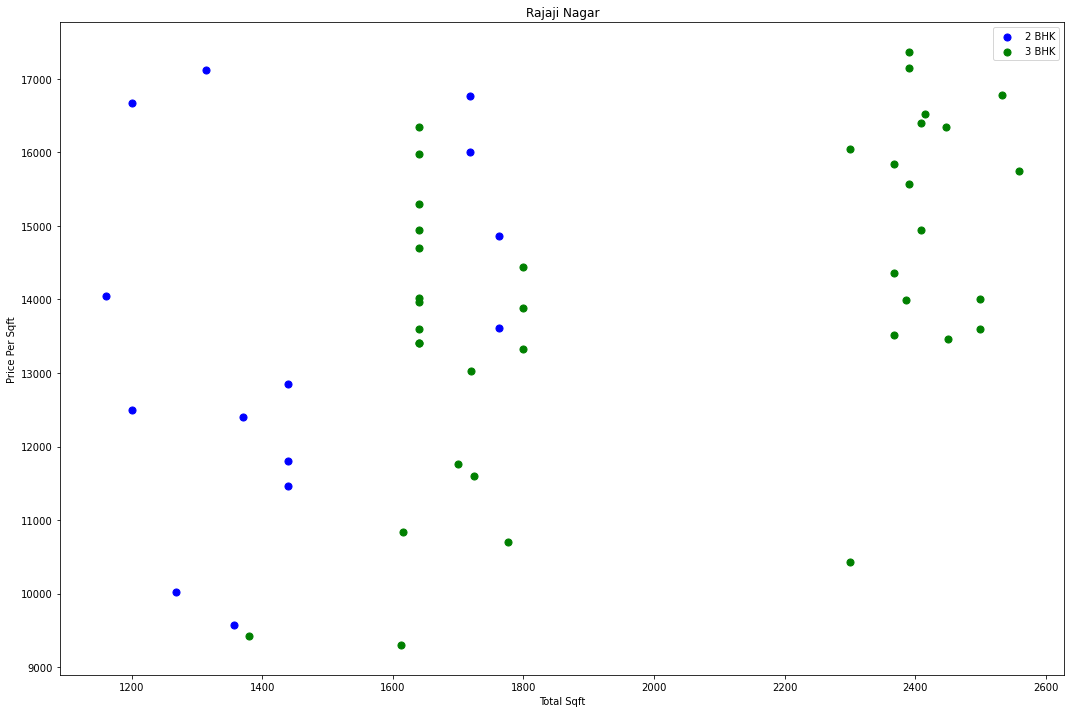

In [45]:
def Price_bhk_Outliers(df,location) :
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    
    matplotlib.rcParams['figure.figsize'] = (18,12)
    
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color="blue",label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color="green",label='3 BHK',s=50)
    
    plt.xlabel("Total Sqft")
    plt.ylabel("Price Per Sqft")
    plt.title(location)
    plt.legend()

Price_bhk_Outliers(df7,"Rajaji Nagar")

In [46]:
"""
from above graph we can see that for some sqft value price of 2 bhk flats are higher than 3 bhk flats with having same location
and we ignore this type of data for simplicity purpose.
"""

'\nfrom above graph we can see that for some sqft value price of 2 bhk flats are higher than 3 bhk flats with having same location\nand we ignore this type of data for simplicity purpose.\n'

In [47]:
def Remove_bhk_outliers(df) :
    
    execlude_indices = np.array([])
    
    # first we need to traverse all location df's
    
    for location , location_df in df.groupby(by='location') :
        
        # here i need to create stats which have mean , std , count based on bhk
        bhk_stats = dict()
        
        for bhk , bhk_df in location_df.groupby(by='bhk') :
            
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std'  : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
            
        # removing outliers
        for bhk , bhk_df in location_df.groupby(by='bhk') :
            
            state = bhk_stats.get(bhk-1)
            
            if state and state['count'] > 5 :
                execlude_indices = np.append(execlude_indices, bhk_df[bhk_df.price_per_sqft<=(state['mean'])].index.values)
        
    return df.drop(execlude_indices,axis='index')

df8 = Remove_bhk_outliers(df7)
df8.shape

(7317, 6)

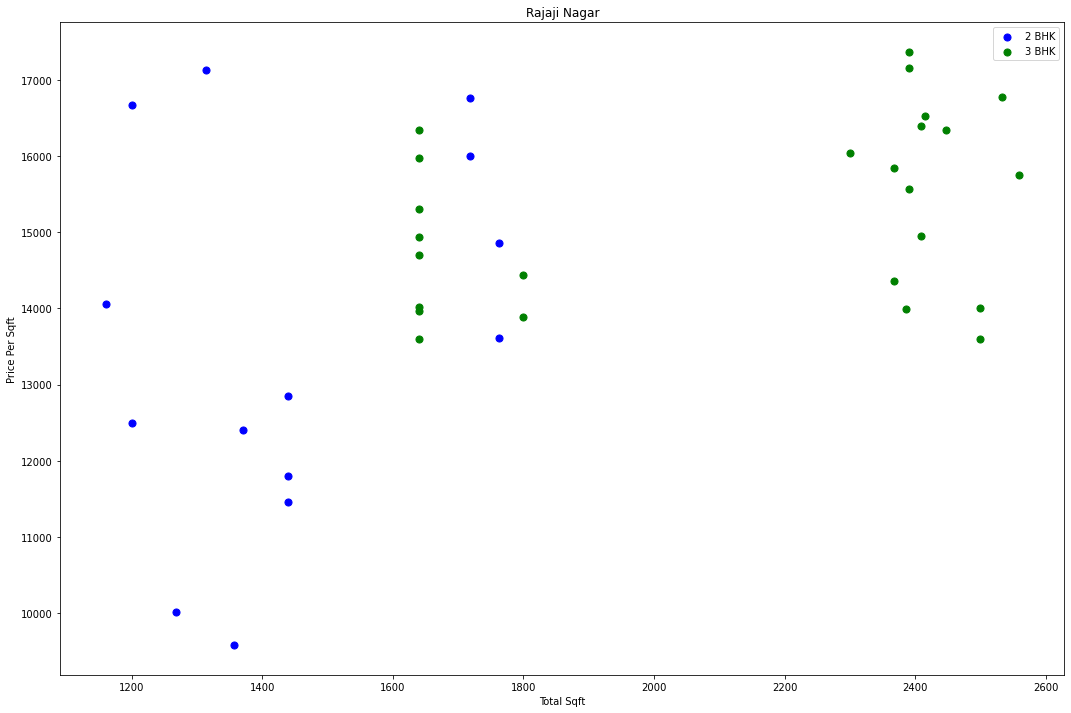

In [48]:
Price_bhk_Outliers(df8,"Rajaji Nagar")

In [49]:
df8.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,42800000.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,19400000.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,23500000.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,13000000.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,14800000.0,2,11983.805668


In [50]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [51]:
df8[df8.bath>9] # so we need to fix some function for number of bathroom per bhk

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,16000000.0,10,4000.000000
8483,other,12000.0,12.0,52500000.0,10,4375.000000
8572,other,10000.0,16.0,55000000.0,16,5500.000000
9306,other,6000.0,12.0,15000000.0,11,2500.000000
9637,other,5425.0,13.0,27500000.0,13,5069.124424


In [52]:
df9 = df8[(df8.bath <= df8.bhk + 1)]    
df9.shape

(7239, 6)

In [53]:
dummies = pd.get_dummies(df9.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
df10 = pd.concat([df9.drop(['location'],axis='columns'),dummies.drop(['other'],axis='columns')],axis='columns')
df10.shape

(7239, 245)

In [55]:
df10.head(5)

,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,42800000.0,4,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,19400000.0,3,11901.840491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,23500000.0,3,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,13000000.0,3,10833.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,14800000.0,2,11983.805668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
list(df10.columns[:10])

['total_sqft',
 'bath',
 'price',
 'bhk',
 'price_per_sqft',
 '1st Block Jayanagar',
 '1st Phase JP Nagar',
 '2nd Phase Judicial Layout',
 '2nd Stage Nagarbhavi',
 '5th Block Hbr Layout']

In [82]:
X = df10.drop(['price','price_per_sqft'],axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
Y = df10.price
len(Y)

7239

# Model Training

In [84]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [116]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)
lr_model.score(X_test,Y_test)

0.8629132245229444

In [117]:
# let's apply K-fold cross validation
from sklearn.model_selection import cross_val_score , ShuffleSplit

cv = ShuffleSplit(n_splits=20,test_size=0.2,random_state=10)
# n_splits : devide total data into 20 blocks and after 10 random shuffling and use train data as 16 and test data as 4 block at one iteration

# for evaluting this CV
cv_scores = cross_val_score(estimator= LinearRegression(),X=X,y=Y,cv=cv)

print(cv_scores,f"Mean : {np.mean(cv_scores)}",sep="\n\n")
# so we get nearly 84% accuracy through Linear Reg. But let's look at Other algorithms also

[0.86291322 0.85632943 0.87669838 0.80558377 0.79969281 0.84376698
 0.84889945 0.84310649 0.88460721 0.81623699 0.80134043 0.83136808
 0.86334329 0.8123263  0.85900367 0.84571306 0.81850563 0.8567117
 0.84863457 0.85479015]

Mean : 0.8414785802571272


In [124]:
# models
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [119]:
# hyper-parameter tuning

In [120]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error'],
                'splitter': ['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.838696,{}
1,lasso,0.838698,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.688815,"{'criterion': 'squared_error', 'splitter': 'be..."


In [121]:
# so our final model is Linear_regression model
lr_model.score(X_test,Y_test)

0.8629132245229444

In [122]:
# checking our model
def Predict(location,bhk,bath,total_sqft) :
    x = np.zeros(len(X.columns))
    
    # for location we need to find index for it
    index = np.where(X.columns == location)[0][0]
    
    x[0] = total_sqft
    x[1] = bath
    x[2] = bhk
    if index >= 0 :
        x[index] = 1
    
    print(x,index)
    return lr_model.predict([x])[0]

In [123]:
Predict(location="1st Phase JP Nagar",bhk=2,bath=2,total_sqft=1000)

[1000.    2.    2.    0.    1.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8386570.258312229

In [113]:
Predict(location="1st Phase JP Nagar",bhk=3,bath=2,total_sqft=1000)
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

[1000.    2.    3.    0.    1.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8236367.614310257

In [128]:
import pickle

with open('model.pkl','wb') as f :
    pickle.dump(lr_model,file=f)

In [132]:
import json

columns = {
    'columns' : [ str(col).lower() for col in X.columns]
}

with open('columns.json','w') as f :
    f.write(json.dumps(columns))